# **Project: Indian Classical Dance Classification & Explainability**



## Phase 1: Rapid Prototyping (3 Epochs)
> *Goal: Verify code stability and compare architectures quickly.*



In [3]:
# ==========================================
# 1. SETUP & REPRODUCIBILITY
# ==========================================
import os, random, kagglehub, numpy as np, pandas as pd, json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, InceptionV3, vgg16, inception_v3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

SEED = 32
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

In [4]:
# ==========================================
# 2. DATA ACQUISITION (Direct Kaggle)
# ==========================================
path = kagglehub.dataset_download("somnath796/indian-dance-form-recognition")
train_csv = next(os.path.join(root, f) for root, _, files in os.walk(path) for f in files if f == 'train.csv')
image_dir = next(os.path.join(root, d) for root, dirs, _ in os.walk(path) for d in dirs if d == 'train')

df = pd.read_csv(train_csv)
df = df[df['Image'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]


Using Colab cache for faster access to the 'indian-dance-form-recognition' dataset.


In [5]:
# ==========================================
# 3. ROBUST GRAD-CAM FUNCTION
# ==========================================
def get_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # We access the internal layer directly to avoid the 'Sequential' attribute error
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, tf.argmax(preds[0])]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


--- Processing Simple_CNN ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.1449 - loss: 21.7170 - val_accuracy: 0.2639 - val_loss: 13.9352
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.3197 - loss: 10.9314 - val_accuracy: 0.1667 - val_loss: 6.7023
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.3825 - loss: 3.1996 - val_accuracy: 0.3333 - val_loss: 2.8675


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_346']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)



--- Processing VGG16 ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 946ms/step - accuracy: 0.1768 - loss: 6.7407 - val_accuracy: 0.1389 - val_loss: 4.7979
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.2849 - loss: 4.1833 - val_accuracy: 0.2500 - val_loss: 3.7718
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step - accuracy: 0.3545 - loss: 2.9329 - val_accuracy: 0.2639 - val_loss: 3.6229


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_352']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)



--- Processing InceptionV3 ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.1510 - loss: 2.2256 - val_accuracy: 0.2361 - val_loss: 1.9406
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.3872 - loss: 1.7440 - val_accuracy: 0.3889 - val_loss: 1.7310
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.5256 - loss: 1.4896 - val_accuracy: 0.4583 - val_loss: 1.6075


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_373']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


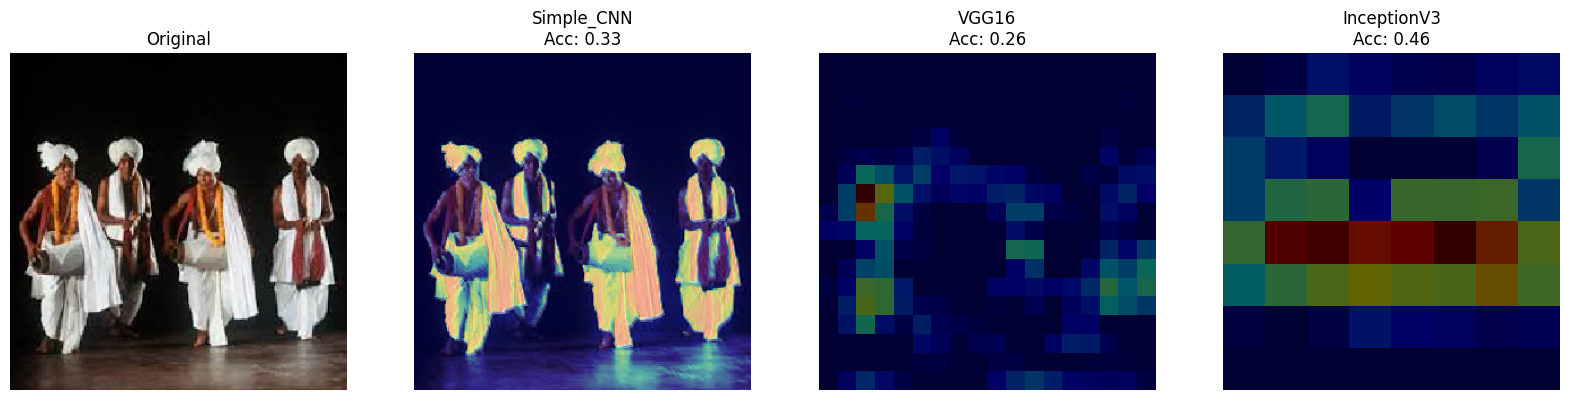

In [6]:
# ==========================================
# 4. MODEL COMPARISON LOOP
# ==========================================
models_to_test = [
    {"name": "Simple_CNN", "layer": "target_conv_cnn", "preprocess": lambda x: x/255.0},
    {"name": "VGG16", "layer": "block5_conv3", "preprocess": vgg16.preprocess_input},
    {"name": "InceptionV3", "layer": "mixed10", "preprocess": inception_v3.preprocess_input}
]

sample_path = os.path.join(image_dir, df.iloc[0]['Image'])
img_raw = load_img(sample_path, target_size=(299, 299))
img_numpy = img_to_array(img_raw)

results = []
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img_raw); axes[0].set_title("Original"); axes[0].axis('off')

for i, m_info in enumerate(models_to_test):
    print(f"\n--- Processing {m_info['name']} ---")

    # Model-Specific Preprocessing
    datagen = ImageDataGenerator(preprocessing_function=m_info['preprocess'], validation_split=0.2)
    train_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='training', seed=SEED, verbose=0)
    val_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='validation', shuffle=False, verbose=0)

    # BUILDING USING FUNCTIONAL API TO PREVENT ATTRIBUTE ERRORS
    inputs = Input(shape=(299, 299, 3))
    if m_info['name'] == "Simple_CNN":
        x = Conv2D(32, (3,3), activation='relu', name="target_conv_cnn")(inputs)
        x = MaxPooling2D(2,2)(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu')(x)
        outputs = Dense(8, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=outputs)
    else:
        base_net = VGG16 if m_info['name'] == "VGG16" else InceptionV3
        base = base_net(weights='imagenet', include_top=False, input_tensor=inputs)
        base.trainable = False
        x = GlobalAveragePooling2D()(base.output)
        outputs = Dense(8, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_gen, validation_data=val_gen, epochs=3, verbose=1)

    # Explainability Result
    proc_img = m_info['preprocess'](np.copy(img_numpy))
    heatmap = get_gradcam_heatmap(np.expand_dims(proc_img, axis=0), model, m_info['layer'])

    axes[i+1].imshow(img_raw)
    axes[i+1].imshow(heatmap, cmap='jet', alpha=0.4)
    axes[i+1].set_title(f"{m_info['name']}\nAcc: {model.evaluate(val_gen, verbose=0)[1]:.2f}")
    axes[i+1].axis('off')

plt.show()

## Phase 2: Final Production Model (25 Epochs)
> *Goal: Achieve maximum accuracy and generate publication-ready heatmaps.*

Finalizing Production for InceptionV3...
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.1922 - loss: 2.1000 - val_accuracy: 0.3056 - val_loss: 1.8570
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.4026 - loss: 1.6602 - val_accuracy: 0.3472 - val_loss: 1.6691
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - accuracy: 0.5837 - loss: 1.3266 - val_accuracy: 0.4306 - val_loss: 1.5201
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.7109 - loss: 1.1616 - val_accuracy: 0.4722 - val_loss: 1.4042
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.7226 - loss: 1.0227 - val_accuracy: 0.5000 - val_loss: 1.3890
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.8154 - loss: 0.8572 - val_accuracy: 0.6111 - val_loss: 1.3023
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.8406 - loss: 0.8030 - val_accuracy: 0.4722 - val_loss: 1.4279
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.7611 - loss: 0.7969 - val_accuracy: 0.65

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_1011']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


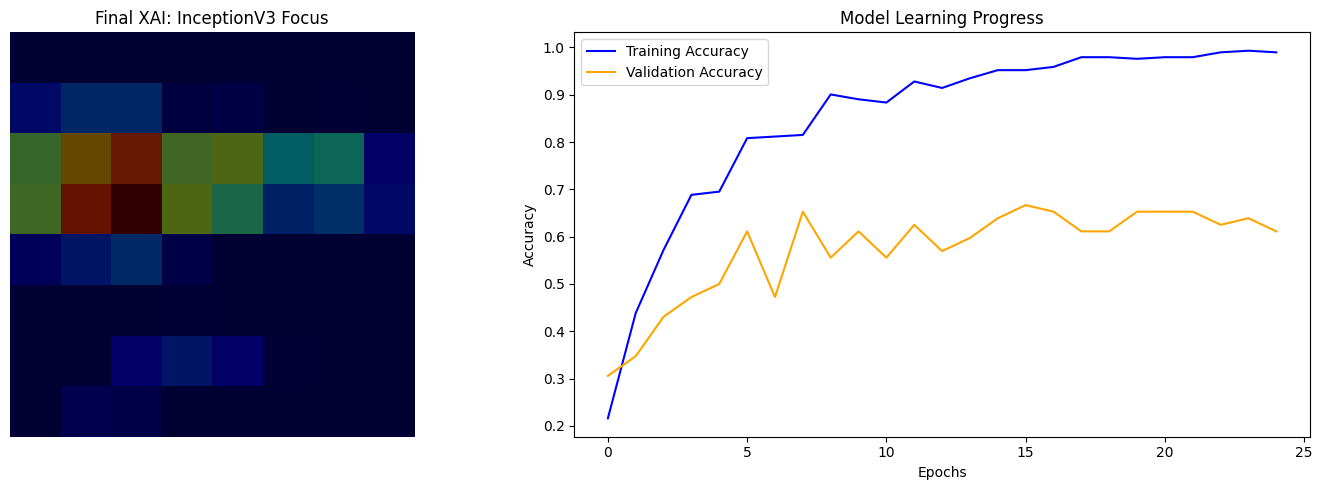

In [10]:
# ==========================================
# PHASE 2: FINAL PRODUCTION RUN (INCEPTION V3)
# ==========================================
# We focus on InceptionV3 because it won the Phase 1 comparison.

m_info = {
    "name": "InceptionV3",
    "layer": "mixed10",
    "preprocess": inception_v3.preprocess_input
}

print(f"Finalizing Production for {m_info['name']}...")

# 1. Setup Data
datagen = ImageDataGenerator(preprocessing_function=m_info['preprocess'], validation_split=0.2)
train_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='training', seed=SEED)
val_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='validation', shuffle=False)

# 2. Build Final Model (Functional API)
inputs = Input(shape=(299, 299, 3))
base = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
outputs = Dense(8, activation='softmax')(x)
final_model = Model(inputs=inputs, outputs=outputs)

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train with Early Stopping (to pick the best epoch)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_dance_model.keras", save_best_only=True)
]

# Note: Since you already ran it, this will run again.
# If you want to skip training, just ensure 'final_model' is the one you just trained.
history = final_model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# 4. FIXING THE NameError: Define img_array properly
# We take a sample image and process it specifically for InceptionV3
sample_path = os.path.join(image_dir, df.iloc[0]['Image'])
img_raw = load_img(sample_path, target_size=(299, 299))
img_numpy = img_to_array(img_raw)

# This creates the 'img_array' the model expects:
img_preprocessed = m_info['preprocess'](np.copy(img_numpy))
img_array = np.expand_dims(img_preprocessed, axis=0)

# 5. Generate and Display the Final "Story"
heatmap = get_gradcam_heatmap(img_array, final_model, m_info['layer'])

# Plotting Results for Publication
plt.figure(figsize=(15, 5))

# Plot A: The Explainability
plt.subplot(1, 2, 1)
plt.imshow(img_raw)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Final XAI: {m_info['name']} Focus")
plt.axis('off')

# Plot B: The Training Performance (Learning Curves)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title("Model Learning Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.savefig("final_publication_results.png")
plt.show()